# Spectra Stitch

Transform music to graphics

## 1. Load libraries

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm  # Import for FontProperties
import textwrap  # Required for text wrapping

## 2. Define functions

In [20]:
def load_audio(file_name):
    """
    Load audio from a given file.
    
    Args:
    - file_name (str): Path to the audio file.

    Returns:
    - tuple: Audio signal and sample rate.
    """
    y, sr = librosa.load(file_name, sr=None)
    return y, sr

def compute_dft_slices(y, X_DIM, Y_DIM):
    """
    Compute DFT slices for the given audio signal.
    
    Args:
    - y (array): Audio signal.
    - X_DIM (int): Width of the resulting image.
    - Y_DIM (int): Height of the resulting image.
    
    Returns:
    - list: DFT slices.
    """
    n_slices = X_DIM * Y_DIM
    slice_len = len(y) // n_slices
    slices = [y[i:i+slice_len] for i in range(0, slice_len * n_slices, slice_len)]
    dft_slices = [np.abs(np.fft.fft(slice)) for slice in slices]
    return dft_slices

def create_colormap(start_hex, end_hex):
    """Create a colormap from start to end HEX colors."""
    start_rgb = mcolors.hex2color(start_hex)
    end_rgb = mcolors.hex2color(end_hex)
    return mcolors.LinearSegmentedColormap.from_list("custom_colormap", [start_rgb, end_rgb], N=256)

def map_to_color(dft_slices, start_hex="#000000", end_hex="#FFFFFF"):
    """
    Map DFT slices to colors based on max frequency using a custom colormap.
    
    Args:
    - dft_slices (list): DFT slices.
    - start_hex (str): Start color in HEX.
    - end_hex (str): End color in HEX.

    Returns:
    - array: Mapped colors.
    """
    max_frequencies = [np.argmax(slice) for slice in dft_slices]
    normalized_frequencies = np.array(max_frequencies) / max(max_frequencies)
    colormap = create_colormap(start_hex, end_hex)
    return colormap(normalized_frequencies)

def reshape(colors, X_DIM, Y_DIM, Y_SCALE):
    """
    Reshape the color data for the final image.
    
    Args:
    - colors (array): Mapped colors.
    - X_DIM (int): Width of the resulting image.
    - Y_DIM (int): Height of the resulting image.
    - Y_SCALE (int): Vertical scaling factor for the image.

    Returns:
    - array: Reshaped image data.
    """
    image = np.reshape(colors, (Y_DIM, X_DIM, 4))[:, :, :3]
    return np.repeat(image, Y_SCALE, axis=0)

def get_text_width(text, fontsize):
    """Helper function to get the rendered width of a text for a given font size."""
    fig_temp = plt.figure(figsize=(10, 10), dpi=80)
    ax_temp = fig_temp.add_subplot(111)
    t = ax_temp.text(0.5, 0.5, text, fontsize=fontsize, visible=True, transform=ax_temp.transAxes)
    fig_temp.canvas.draw()
    width = t.get_window_extent().width
    plt.close(fig_temp)
    return width

def add_text_to_image(ax, image_dim, text=None, color='white', text_width_percent=80):
    """Adds specified text to the image at the center."""
    if text:
        target_width = text_width_percent / 100 * image_dim[1]

        # Estimate characters per line based on the percentage of image width
        chars_per_line = len(text) * target_width / image_dim[1]  # initial estimate
        wrapped_text = '\n'.join(textwrap.wrap(text, width=int(chars_per_line)))

        # Initial font size and width estimate
        fontsize = 12
        text_width = get_text_width(wrapped_text, fontsize)

        # Iterative process to adjust font size
        max_iterations = 10
        for _ in range(max_iterations):
            # Adjust font size proportionally
            fontsize *= target_width / text_width
            text_width = get_text_width(wrapped_text, fontsize)

        # Draw the final text
        center_x = image_dim[1] / 2
        center_y = image_dim[0] / 2
        ax.text(center_x, center_y, wrapped_text, color=color, fontweight='bold',
                fontsize=fontsize, ha='center', va='center')


def main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text=None, text_color='white', text_width_percent=80):
    # Use load_audio function to load music file
    y, sr = load_audio(MUSIC_FILE_NAME)
    dft_slices = compute_dft_slices(y, X_DIM, Y_DIM)
    colors = map_to_color(dft_slices, HEX_START, HEX_END)
    # Plot image
    image = reshape(colors, X_DIM, Y_DIM, Y_SCALE)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    # Add optional text overlay to the image
    image_dim = image.shape
    add_text_to_image(ax, image_dim, text, text_color, text_width_percent)
    # Save image to lossless pdf file, upscale to dpi
    plt.savefig(GRAPHICS_FILE_NAME, bbox_inches='tight', pad_inches=0, dpi=PDF_RESOLUTION)
    plt.show()
    

# import argparse
# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Generate graphics from music using DFT.")
#     parser.add_argument("MUSIC_FILE_NAME", type=str, help="Path to the music file.")
#     parser.add_argument("GRAPHICS_FILE_NAME", type=str, help="Path to save the generated graphics.")
#     parser.add_argument("X_DIM", type=int, help="Width of the generated image.")
#     parser.add_argument("Y_DIM", type=int, help="Height of the generated image.")
#     parser.add_argument("PDF_RESOLUTION", type=int, help="Resolution of the saved PDF.")
    
#     args = parser.parse_args()
    
#     main(args.MUSIC_FILE_NAME, args.GRAPHICS_FILE_NAME, args.X_DIM, args.Y_DIM, args.PDF_RESOLUTION)

## 3. Run on select samples

#### Perform DFT and store results

#### Perform graphical operations

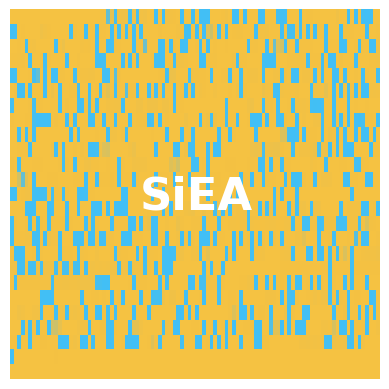

In [22]:
# Write code that uses above functions to create a spectrogram image from a music file
# Use the following parameters:
MUSIC_FILE_NAME = 'Samples/sample_1.mp3'
GRAPHICS_FILE_NAME = 'Outputs/sample_1_output_2.pdf'
X_DIM=100
Y_DIM=25
Y_SCALE=4
HEX_START='#f5c242'
HEX_END='#42bff5'
text = ' SiEA '
PDF_RESOLUTION=3000
# Run main function, pass file names under subfolers 'Samples' and 'Outputs'
main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text, text_color='white', text_width_percent=80)


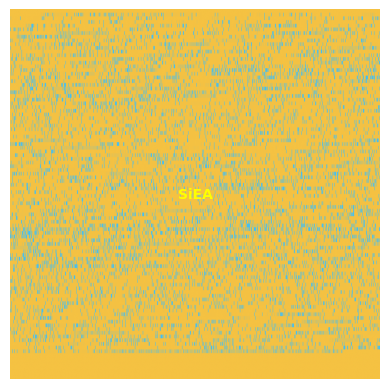

         1354349 function calls (1352305 primitive calls) in 87.781 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.049    1.049 2800228076.py:1(load_audio)
        1    0.000    0.000    0.001    0.001 2800228076.py:12(create_colormap)
        1    0.001    0.001    0.529    0.529 2800228076.py:17(map_to_color)
        1    0.055    0.055    0.507    0.507 2800228076.py:18(<listcomp>)
        1    0.000    0.000    0.014    0.014 2800228076.py:25(reshape)
        1    0.000    0.000    0.000    0.000 2800228076.py:33(add_text_to_image)
        1    0.005    0.005   87.767   87.767 2800228076.py:42(main)
        1    0.000    0.000    2.080    2.080 2800228076.py:5(compute_dft_slices)
        1    0.072    0.072    0.072    0.072 2800228076.py:8(<listcomp>)
        1    0.613    0.613    2.008    2.008 2800228076.py:9(<listcomp>)
        8    0.000    0.000    0.026    0.003 <__array_functio

In [7]:
import cProfile

cProfile.run('main(MUSIC_FILE_NAME, GRAPHICS_FILE_NAME, X_DIM, Y_DIM, Y_SCALE, HEX_START, HEX_END, PDF_RESOLUTION, text, text_color="yellow", text_width_percent=80)')
